In [47]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pyreadr
pd.options.display.max_columns=100

In [48]:
country = 'uk'

In [ ]:
df = pd.read_csv('../data/regression_dataframes/uk_regression_df.csv')

In [87]:
df_gb = df.groupby(['country', 'geo_var'])
df_gb = pd.DataFrame({
    'liwc_score': df_gb['liwc_score'].mean(),
    'liwc_score_std': df_gb['liwc_score'].std(),
    'liwc_count': df_gb['liwc_count'].sum(),
    'temp': df_gb['temp'].mean()#,
#     'temp_max': df_gb['temp_max'].max(),
#     'prcp': df_gb['prcp'].mean()
}).reset_index()

In [88]:
df_gb.head()

,country,geo_var,liwc_score,liwc_score_std,liwc_count,temp
0,United Kingdom,Aberdeen City,0.683443,0.090890,40866,6.915829
1,United Kingdom,Aberdeenshire,0.695780,0.094811,28096,7.036524
2,United Kingdom,An Cabhan,0.622642,0.454266,63,9.953125
3,United Kingdom,Anglesey,0.709626,0.245868,3775,8.857143
4,United Kingdom,Angus,0.661247,0.191417,11137,7.852564


In [91]:
temp = pd.read_csv('../output/uk_city_brexit.csv')
temp = pd.merge(df_gb, temp, how='left', left_on=['country', 'geo_var'], right_on=['country', 'city'])
temp = temp[temp['liwc_count']>100]
temp = temp[temp['brexit_leave_score'].notnull()]

In [92]:
temp.shape

(69, 8)

Text(0, 0.5, 'Vote for Brexit')

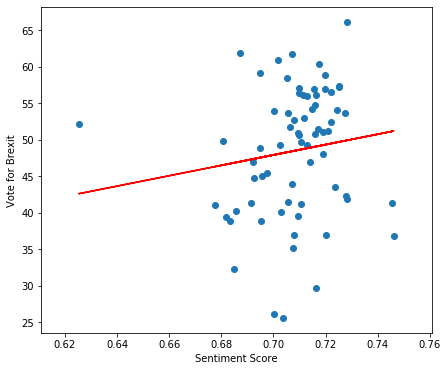

In [93]:
from numpy.polynomial.polynomial import polyfit

plt.figure(figsize=(7,6))

b, m = polyfit(temp['liwc_score'], temp['brexit_leave_score'], 1)

plt.scatter(temp['liwc_score'], temp['brexit_leave_score'])
plt.plot(temp['liwc_score'], b + m * temp['liwc_score'], '-', color='red')
plt.xlabel('Sentiment Score')
plt.ylabel('Vote for Brexit')

In [94]:
temp[['liwc_score', 'brexit_leave_score']].corr()

,liwc_score,brexit_leave_score
liwc_score,1.000000,0.138753
brexit_leave_score,0.138753,1.000000


In [348]:
from pydoc import help
from scipy.stats.stats import pearsonr

In [349]:
pearsonr(temp['liwc_score'], temp['brexit_leave_score'])

(-0.10470024403785849, 0.39548510298761647)

In [353]:
np.corrcoef(temp['liwc_score'], temp['brexit_leave_score'])[0, 1]

-0.10470024403785849